# <center>Đồ án 3: Linear Regression</center>

# Thông tin sinh viên

- Họ và tên: Nguyễn Văn Lê Bá Thành
- MSSV: 22127390
- Lớp: 22CLC08

# Import

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import thêm dữ thư viện nếu cần

# Đọc dữ liệu

In [5]:
# Đọc dữ liệu bằng pandas
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Lấy các đặc trưng X và giá trị mục tiêu y cho các tập huấn luyện (train) và kiểm tra (test)
X_train = train.iloc[:, :-1]    # Dataframe (chứa 5 đặc trưng huấn luyện)
y_train = train.iloc[:, -1]     # Series    (chứa 1 giá trị mục tiêu huấn luyện)

X_test = test.iloc[:, :-1]      # Dataframe (chứa 5 đặc trưng kiểm tra)
y_test = test.iloc[:, -1]       # Series    (chứa 1 giá trị mục tiêu kiểm tra)

# Sinh viên có thể sử dụng các khác nếu cần

# Cài đặt hàm

In [56]:
# Cài đặt các hàm cần thiết ở đây

class OLSLinearRegression:
    def fit(self, X, y):
        ''' 
        This function is used to fit the model to the data. It uses the Ordinary Least Squares method to find the optimal parameters.

        Parameters
        ----------
        X : np.array
            Input data
        y : np.array
            Output data

        Returns
        -------
        self : object
            Returns the instance of the class
        
        '''

        X_pinv = np.linalg.inv(X.T @ X) @ X.T    # np.linalg.pinv(X)
        self.w = X_pinv @ y

        return self
    

    def get_params(self):
        ''' 
        This function is used to get the parameters of the model.

        Returns
        -------
        self.w : np.array
            Optimal parameters (column vector)
        '''

        return self.w


    def predict(self, X):
        ''' 
        This function is used to predict the output of the model.

        Parameters
        ----------
        X : np.array
            Input data

        Returns
        -------
        X @ self.w : np.array
            Predicted output
        '''

        return np.dot(X, self.w)  # Equivalent to np.dot(X, self.w). But why?
    
# hàm tính RMSE
def mae(y, y_hat):
    ''' 
    This function is used to calculate the mean absolute error (MAE).

    Parameters
    ----------
    y : np.array
        Output data
    y_hat : np.array
        Predicted output data

    Returns
    -------
    np.mean(np.abs(y.ravel() - y_hat.ravel())) : float
        Mean absolute error
    '''

    return np.mean(np.abs(y - y_hat))

*Chú thích: Cần có docstrings cho các hàm.*

# Yêu cầu 1: Phân tích khám phá dữ liệu (1 điểm)

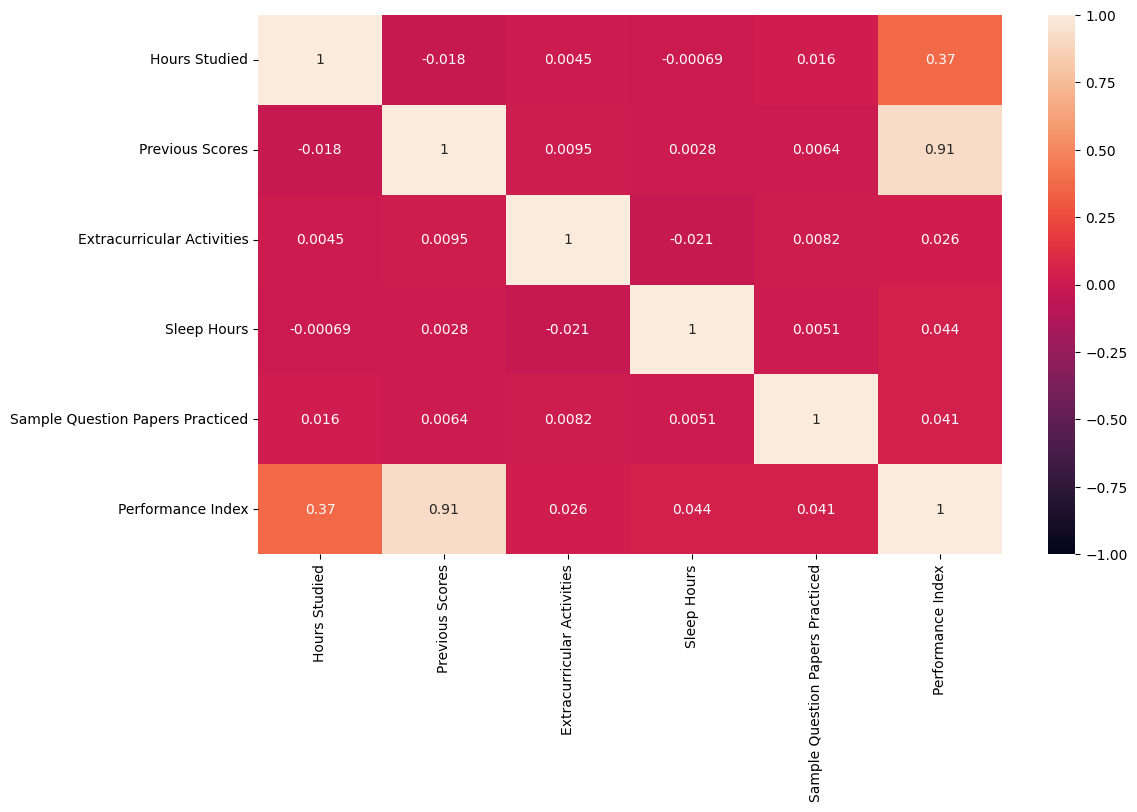

In [30]:
# Phân tích khám phá dữ liệu thông qua thống kê và các biểu đồ
# Chỉ được phân tích trên tập huấn luyện
train.describe().T

# num_cols = train.columns
# for col in num_cols:
#     print(col)
#     print('Skew :', round(train[col].skew(), 2))
#     plt.figure(figsize = (15, 4))
#     plt.subplot(1, 2, 1)
#     train[col].hist(grid=False)
#     plt.ylabel('count')
#     plt.subplot(1, 2, 2)
#     sns.boxplot(x=train[col])
#     plt.show()


# fig, axes = plt.subplots(3, 2, figsize = (20, 20))
# fig.suptitle('Bar plot for all categorical variables in the dataset')
# sns.countplot(ax = axes[0, 0], x = 'Hours Studied', data = train, color = 'blue', 
#               order = train['Hours Studied'].value_counts().index);
# sns.countplot(ax = axes[0, 1], x = 'Previous Scores', data = train, color = 'blue', 
#               order = train['Previous Scores'].value_counts().index);
# sns.countplot(ax = axes[1, 0], x = 'Extracurricular Activities', data = train, color = 'blue', 
#               order = train['Extracurricular Activities'].value_counts().index);
# sns.countplot(ax = axes[1, 1], x = 'Sleep Hours', data = train, color = 'blue', 
#               order = train['Sleep Hours'].value_counts().index);
# sns.countplot(ax = axes[2, 0], x = 'Sample Question Papers Practiced', data = train, color = 'blue', 
#               order = train['Sample Question Papers Practiced'].head(15).value_counts().index);
# sns.countplot(ax = axes[2, 1], x = 'Performance Index', data = train, color = 'blue', 
#               order = train['Performance Index'].head(15).value_counts().index);
# axes[1][1].tick_params(labelrotation=45);
# axes[2][0].tick_params(labelrotation=90);
# axes[2][1].tick_params(labelrotation=90);

# fig, axarr = plt.subplots(5, figsize=(12, 30))
# train.groupby('Hours Studied')['Performance Index'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0], fontsize=12)
# axarr[0].set_title("Hours Studied Vs Performance Index", fontsize=18)
# train.groupby('Previous Scores')['Performance Index'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1], fontsize=12)
# axarr[1].set_title("Previous Scores Vs Performance Index", fontsize=18)
# train.groupby('Extracurricular Activities')['Performance Index'].mean().sort_values(ascending=False).plot.bar(ax=axarr[2], fontsize=12)
# axarr[2].set_title("Extracurricular Activities Vs Performance Index", fontsize=18)
# train.groupby('Sleep Hours')['Performance Index'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3], fontsize=12)
# axarr[3].set_title("Sleep Hours Vs Performance Index", fontsize=18)
# train.groupby('Sample Question Papers Practiced')['Performance Index'].mean().sort_values(ascending=False).head(20).plot.bar(ax=axarr[4], fontsize=12)
# axarr[4].set_title("Sample Question Papers Practiced Vs Performance Index", fontsize=18)
# plt.subplots_adjust(hspace=1.0)
# plt.subplots_adjust(wspace=.5)
# sns.despine()

plt.figure(figsize=(12, 7))
sns.heatmap(train.corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

# Yêu cầu 2a: Xây dựng mô hình sử dụng toàn bộ 5 đặc trưng đề bài cung cấp (2 điểm) 

In [57]:
# Phần code cho yêu cầu 2a
model = OLSLinearRegression().fit(X_train, y_train)
model.get_params()

0    2.193014
1    0.817511
2   -1.149285
3   -1.505496
4   -0.268546
dtype: float64

In [53]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra
y_hat = model.predict(X_test)
print(f'MAE: {mae(y_test, y_hat)}')

MAE: 4.903977774115992


Công thức hồi quy, phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012

$$\text{Student Performance} = ...$$

# Yêu cầu 2b: Xây dựng mô hình sử dụng duy nhất 1 đặc trưng, tìm mô hình cho kết quả tốt nhất (2 điểm)

Lưu ý: Khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ đặc trưng

In [14]:
# Phần code cho yêu cầu 2b
# Tìm ra đặc trưng tốt nhất (trong 5 đặc trưng)
# In ra các kết quả cross-validation như yêu cầu

In [ ]:
# Huấn luyện lại mô hình best_feature_model với đặc trưng tốt nhất trên toàn bộ tập huấn luyện

In [ ]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình best_feature_model

Công thức hồi quy (dựa trên mô hình đặc trưng tốt nhất), phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012

$$\text{Student Performance} = ...$$

# Yêu cầu 2c: Sinh viên tự xây dựng/thiết kế mô hình, tìm mô hình cho kết quả tốt nhất (2 điểm)

## Xây dựng/Thiết kế mô hình

In [16]:
# Trình bày toàn bộ code liên quan đến việc thiết kế mô hình

## Tìm mô hình cho kết quả tốt nhất

Lưu ý: Khi sử dụng cross-validation, sinh viên cần xáo trộn dữ liệu 1 lần duy nhất và thực hiện trên toàn bộ $m$ mô hình mà sinh viên thiết kế

In [ ]:
# Phần code cho yêu cầu 2c
# Tìm ra mô hình tốt nhất (trong m mô hình mà sinh viên tự thiết kế)
# In ra các kết quả cross-validation như yêu cầu

In [ ]:
# Huấn luyện lại mô hình my_best_model trên toàn bộ tập huấn luyện

In [ ]:
# Gọi hàm MAE (tự cài đặt hoặc từ thư viện) trên tập kiểm tra với mô hình my_best_model

Công thức hồi quy (dựa trên mô hình tốt nhất mà sinh viên tự xây dựng/thiết kế), phần trọng số làm tròn đến 3 chữ số thập phân, ví dụ 0.012345 $\to$ 0.012

$$\text{Student Performance} = ...$$